# Introduction to Big Data - Project

In this jupyter notebook, you will find my project. I've tried to solve the tasks in order, following each requirement of the project discription. 

My dataset is the 7-th, which cointains 2 years of weather data.

First, we have to import the needed libraries.

In [1]:
# Import the needed libraries

import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
from matplotlib import pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

If we want to suppress any pandas warnings, we have to execute the following line.

In [2]:
# Hide any pandas warnings

pd.options.mode.chained_assignment = None  

Let's load our dataset and examine the first 10 rows.

In [3]:
# Load the dataset

df = pd.read_csv('C:/Users/Visny/Desktop/BIGDATA/beadando/data_7.csv')

In [4]:
# Let's take a look at the first 10 rows of the dataset

df.head(10)

,water_level,precipitation,temperature,humidity,visibility,wind,weather,pressure,fire,wl_change,temp_change,pressure_change
0,468.0,0.0,24.9,31.0,100.0,4.0,0.0,993.8,4.0,-3.0,-0.3,-0.4
1,140.0,0.0,27.9,22.0,20.0,1.0,0.0,1004.1,4.0,-2.0,0.6,-1.0
2,464.0,0.0,25.6,28.0,20.0,2.0,1.0,1001.2,4.0,-7.0,-1.8,-0.3
3,467.0,0.0,26.7,26.0,100.0,3.0,0.0,992.3,4.0,-1.0,1.2,-1.3
4,138.0,0.0,29.1,22.0,20.0,1.0,0.0,1001.3,4.0,-2.0,2.5,-1.3
5,461.0,0.0,27.2,30.0,20.0,3.0,0.0,999.9,4.0,-3.0,-0.8,-0.7
6,459.0,16.0,21.0,88.0,10.0,1.0,3.0,987.3,5.0,-1.0,1.6,1.3
7,500.0,2.0,18.2,93.0,10.0,1.0,8.0,996.6,4.0,-2.0,-8.0,2.6
8,459.0,16.0,21.0,88.0,10.0,1.0,3.0,987.3,5.0,-1.0,1.6,1.3
9,500.0,2.0,18.2,93.0,10.0,1.0,8.0,996.6,4.0,-2.0,-8.0,2.6


We can check the data type of each column.

In [5]:
# Datatype of each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1439 entries, 0 to 1438
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   water_level      1439 non-null   float64
 1   precipitation    1439 non-null   float64
 2   temperature      1439 non-null   float64
 3   humidity         1439 non-null   float64
 4   visibility       1439 non-null   float64
 5   wind             1439 non-null   float64
 6   weather          1439 non-null   float64
 7   pressure         1439 non-null   float64
 8   fire             1439 non-null   float64
 9   wl_change        1439 non-null   float64
 10  temp_change      1439 non-null   float64
 11  pressure_change  1439 non-null   float64
dtypes: float64(12)
memory usage: 135.0 KB


By quickly running through our .csv file, it's easy to see that there are columns where instead of float values, it's easier to use int type values. We change the datatype of the desired columns like this:

In [6]:
# Changing the datatype of certain columns

df['water_level'] = df['water_level'].astype(int)
df['precipitation'] = df['precipitation'].astype(int)
df['humidity'] = df['humidity'].astype(int)
df['visibility'] = df['visibility'].astype(int)
df['wind'] = df['wind'].astype(int)
df['weather'] = df['weather'].astype(int)
df['fire'] = df['fire'].astype(int)
df['wl_change'] = df['wl_change'].astype(int)

Now, we can check the modifications by executing again these two lines.

In [7]:
# Make sure the previous step provided the waited result

df.head(10)

,water_level,precipitation,temperature,humidity,visibility,wind,weather,pressure,fire,wl_change,temp_change,pressure_change
0,468,0,24.9,31,100,4,0,993.8,4,-3,-0.3,-0.4
1,140,0,27.9,22,20,1,0,1004.1,4,-2,0.6,-1.0
2,464,0,25.6,28,20,2,1,1001.2,4,-7,-1.8,-0.3
3,467,0,26.7,26,100,3,0,992.3,4,-1,1.2,-1.3
4,138,0,29.1,22,20,1,0,1001.3,4,-2,2.5,-1.3
5,461,0,27.2,30,20,3,0,999.9,4,-3,-0.8,-0.7
6,459,16,21.0,88,10,1,3,987.3,5,-1,1.6,1.3
7,500,2,18.2,93,10,1,8,996.6,4,-2,-8.0,2.6
8,459,16,21.0,88,10,1,3,987.3,5,-1,1.6,1.3
9,500,2,18.2,93,10,1,8,996.6,4,-2,-8.0,2.6


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1439 entries, 0 to 1438
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   water_level      1439 non-null   int32  
 1   precipitation    1439 non-null   int32  
 2   temperature      1439 non-null   float64
 3   humidity         1439 non-null   int32  
 4   visibility       1439 non-null   int32  
 5   wind             1439 non-null   int32  
 6   weather          1439 non-null   int32  
 7   pressure         1439 non-null   float64
 8   fire             1439 non-null   int32  
 9   wl_change        1439 non-null   int32  
 10  temp_change      1439 non-null   float64
 11  pressure_change  1439 non-null   float64
dtypes: float64(4), int32(8)
memory usage: 90.1 KB


So far so good. Let's see the number of rows in our dataset.

In [9]:
# Let's print out the number of rows in the dataset, just for curiosity

num_rows = df.shape[0]

# Print the number of rows
print('Number of rows:', num_rows)

Number of rows: 1439


If we check the .csv again, we can see some negative values in our first column. If i'm right, the water_level column should not contain negative values. For example, if we consider an empty, completely dry a lake, the smallest value we can measure is 0. Therefore, it is unnecessary to meausure the water level, because there is no water. Following my theory, we can change the negative values in the column by executing the followings. 

In [10]:
# The first water_level column contains negative values, which is impossible
# We need a function to modify these values to 0

def zero_negatives(x):
    if x < 0:
        return 0
    else:
        return x

# Apply the function
df['water_level'] = df['water_level'].apply(zero_negatives)

Now, we can move on. If we want to understand the content of the dataset and the relationships between the features, we can visualize the data. Above, there are 5 plots representing the connections between the columns. I have tried to make the right comparisions.

Firstly, we can plot the mean visibility of each weather type. I think we should use a barplot for this task.

<Axes: xlabel='weather', ylabel='visibility'>

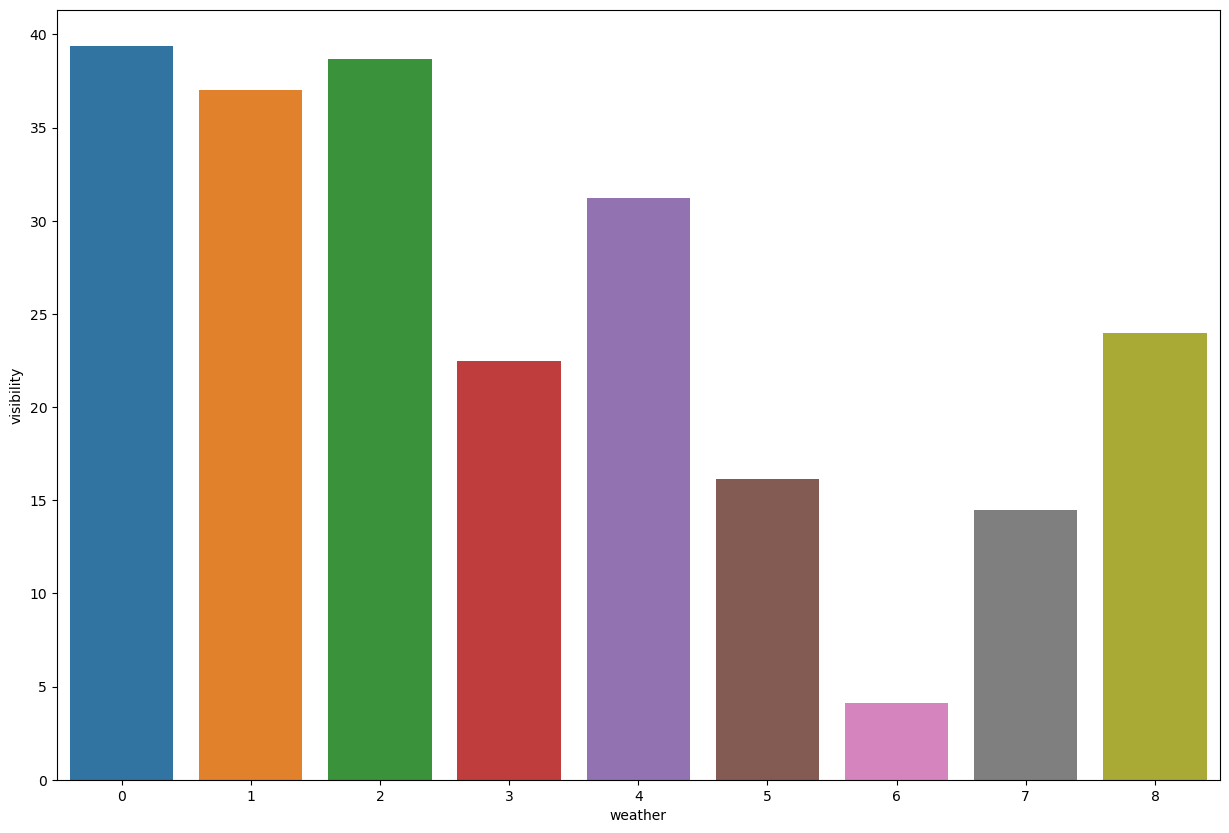

In [11]:
# Plot the mean visibility of each weather type using barplot

fig = plt.figure(figsize=(15, 10))
sns.barplot(x='weather', y='visibility', data=df, errorbar=None)

The figure shows us that the first 3 (0 - Partly Cloudy, 1 - Cloudy, 2 - Clear) weather types have the highest visibility values, and as expected, the types number 5, 6, and 7 have the least.

The second plot will show boxplots for every weather type.

<Axes: xlabel='weather', ylabel='water_level'>

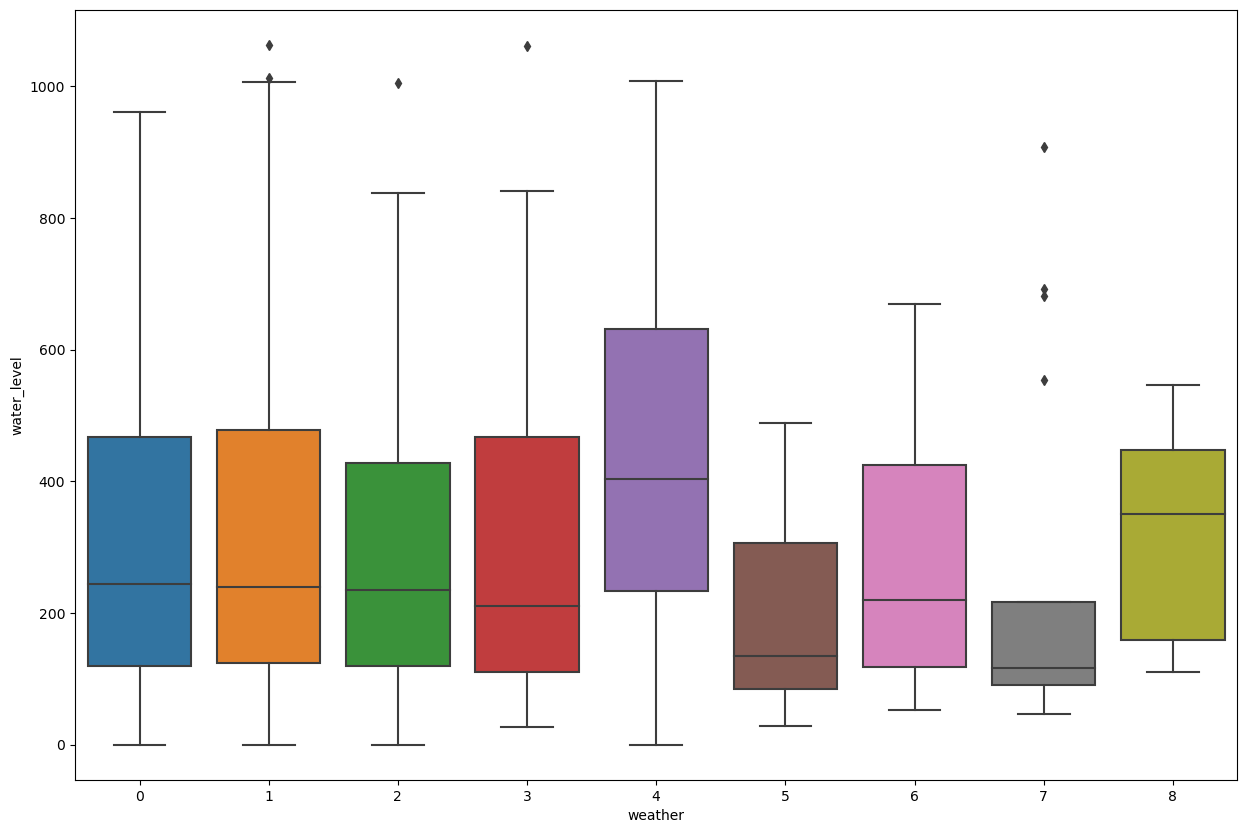

In [12]:
# Plot a box for every weather type using boxplot. 

fig = plt.figure(figsize=(15, 10))
sns.boxplot(x='weather', y='water_level', data=df)

We can see the minimum and maximum values as well as the median values of each weather type.
The little diamonds are representing the outliers: extreme values or anomalies.
The 8-th weather type (Storm) has the highest median followed by number 4 (Strong wind). This means that the water level is the highest under these two weather conditions.
It is easy to see that the range of values are narrower under the wather conditions 5-8 than they are in the first 5 cases.
This means that the variability of water levels is lower during weather conditions 5-8: the values are more concentrated indicating stable conditions for water levels.

For understanding the relationship between temperature and water level ,we are using regplot.

<Axes: xlabel='temperature', ylabel='water_level'>

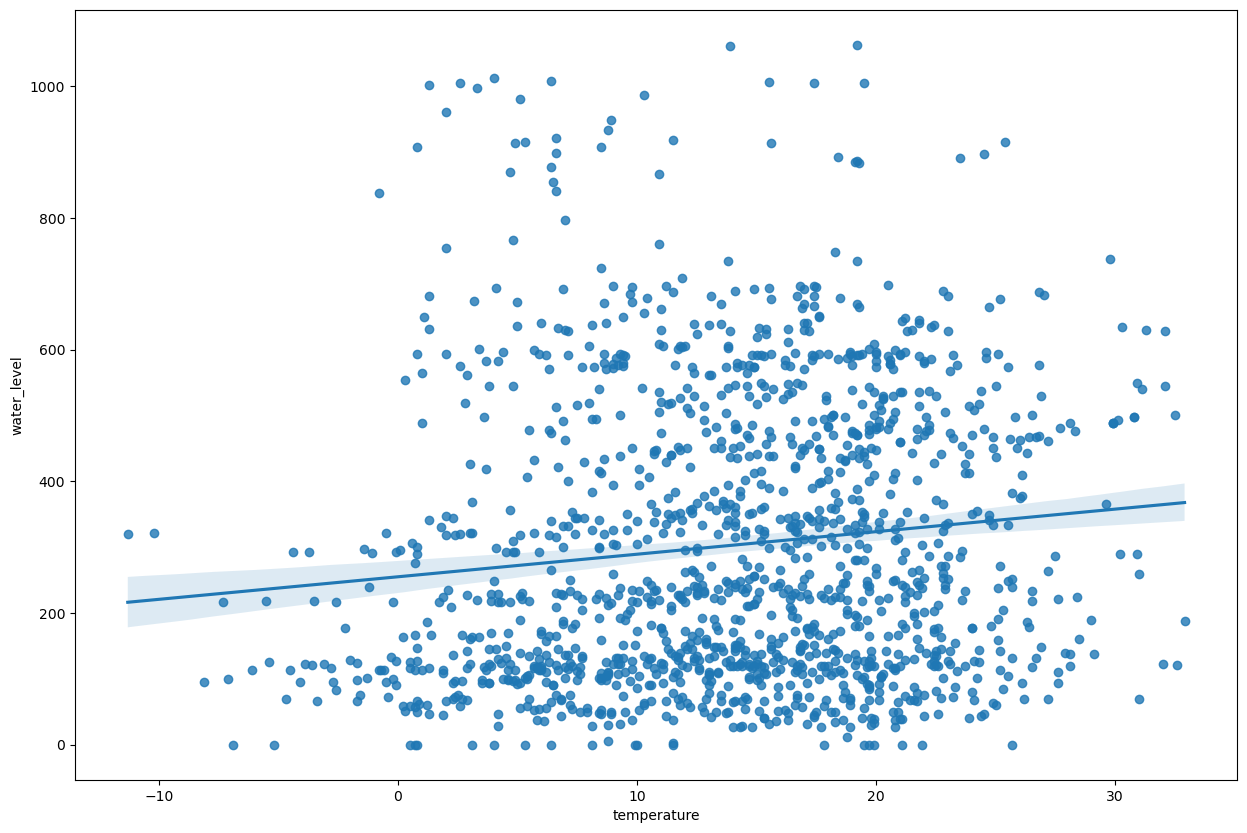

In [13]:
# Relationship between temperature and water level using regplot

fig = plt.figure(figsize=(15, 10))
sns.regplot(x='temperature', y='water_level', data=df)

The figure shows us that as the temperature increases, the water level values are slightly increasing too.

Next, we can plot a heatmap. Therefore we can see the relationship between the columns.

<Axes: >

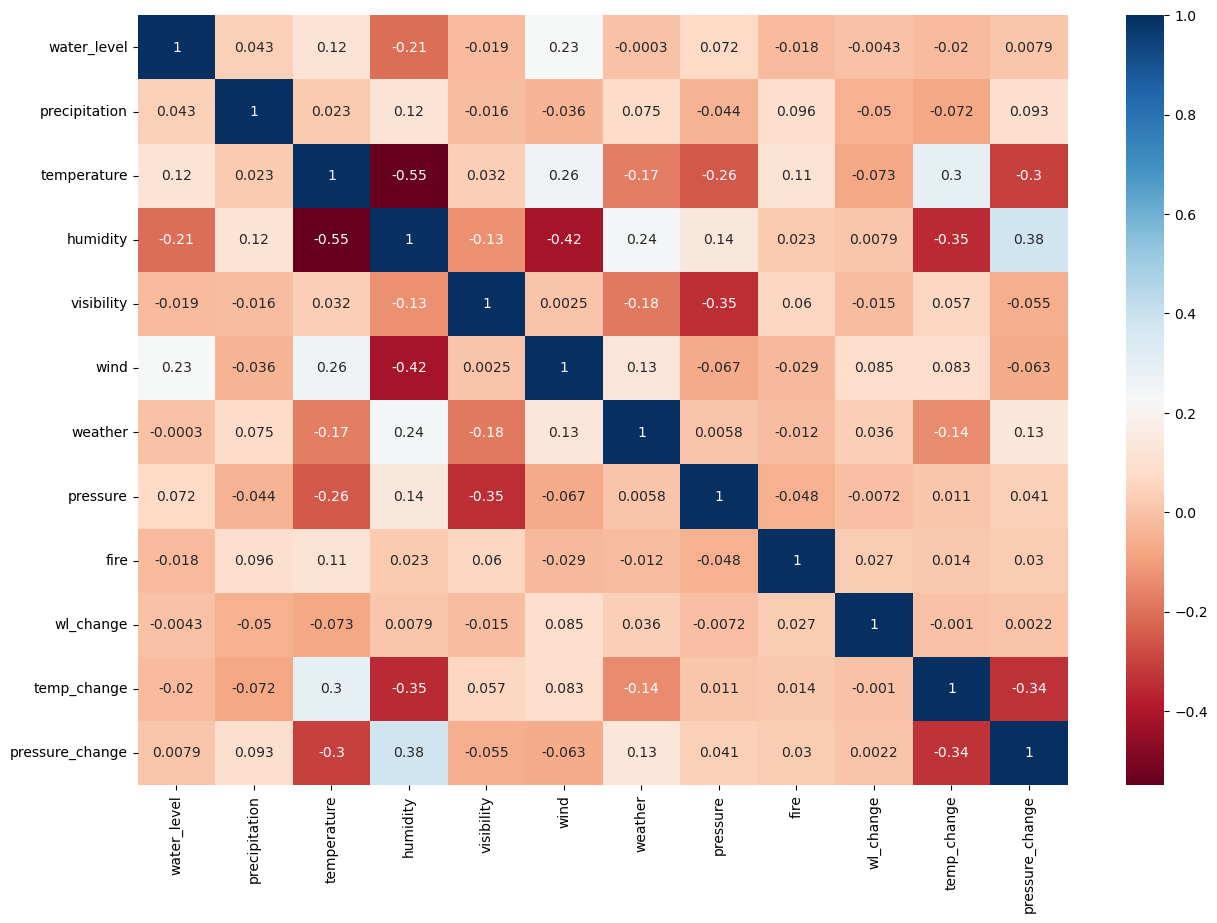

In [14]:
# Creating a correlation heatmap to identify how well the features correlate with each other

correlations = df.corr()   # Create the correlation matrix

fig = plt.figure(figsize=(15, 10))
sns.heatmap(correlations, annot=True, cmap='RdBu')

The figure shows us that we have more dark red and light orange colored values than blue.
This means that between the majority of the values there is no linear trend (light orange colored, 0 like values).
On the other hand, we have some negative values represented by dark red color. This means that between some values, there is a trend, so they are correlated. 
The negative values are representing the type of connection between the values, where one variable will decrease as the other increases.

Our last plot will be pairplot, which consists of multiple scatterplots.

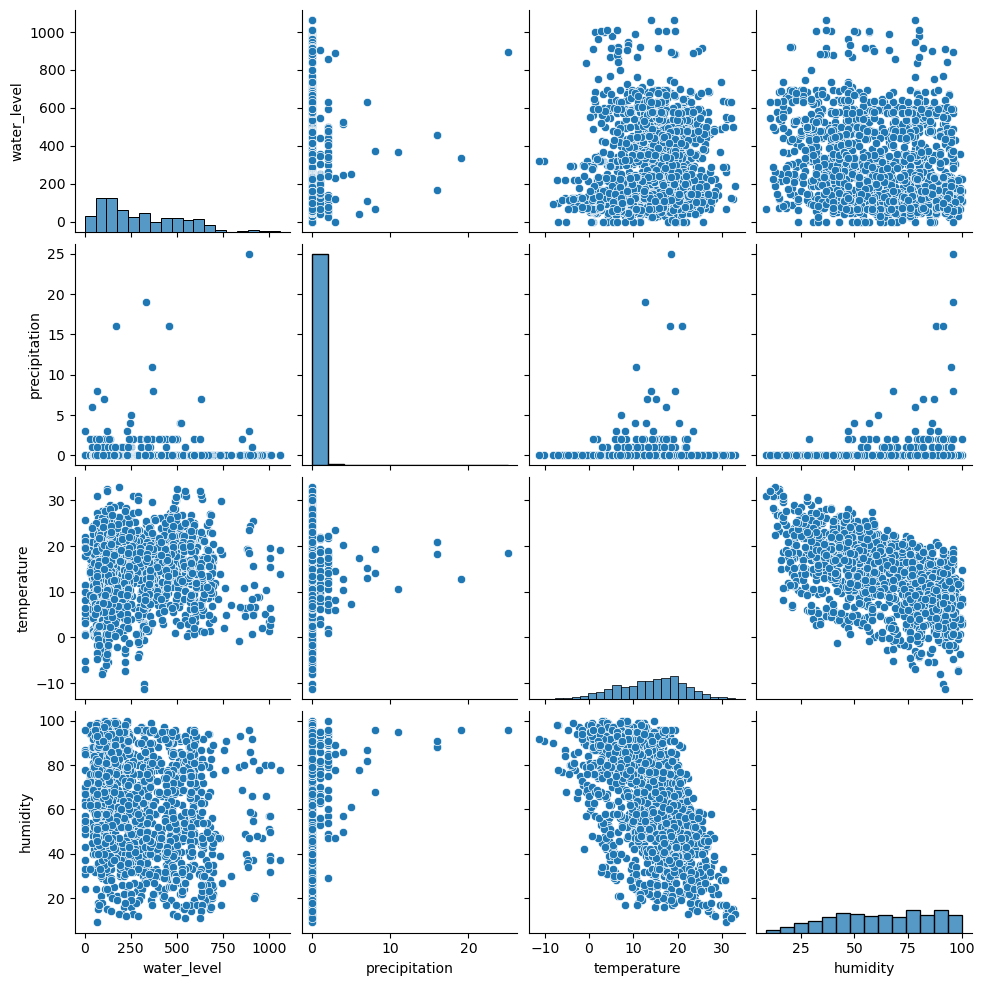

In [15]:
# Crating a grid of scatterplots to to identify nonlinear relationships using pairplot
# Each plot shows the relationship between two variables

sns.pairplot(data=df[['water_level', 'precipitation', 'temperature', 'humidity']])        

Water level and precipitation --> Positive correlation

Temperature and humidity --> No positive correlation, but there are few points in the lower left and upper right regions of the plot. 
It indicates that certain temperature and humidity combinations are more prevalent than others.   

## Regression model

If we want to create a regression model, we have to select the input columns and the target column. Hopefully, the more target correlated columns we use as input columns, the higher R2 score we will get at the end.

In [16]:
# Select input column (X) and target column (y)

X = df[['humidity','pressure','wind','fire','temp_change','pressure_change','water_level','precipitation','weather']]
y = df['temperature']

Now, we split the dataset into training and testing parts as required. 
If we choose 0.2 as the test_size value, 20 % of the dataset will be used for testing, and 80 % will be used for training. 
I have tried to modify the test_size parameter multiple times to get a better result, but as it turned out, the best result is achieved if we stick to the original 20 % - 80 % plan.

In [17]:
# Split the dataset into training and testing parts

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

It is time to choose the model we want to use. 
I've decided to use the Random Forest regression model. It uses decision trees at training time, aggregates the result of these trees and outputs the most optimal result. (The mean of prediction)

In [18]:
# Create a Random Forest regression model 

reg_model = RandomForestRegressor(n_estimators=100, random_state=42)

Now, we fit the model like this:

In [19]:
# Fit the model using the training set

reg_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

We can predict the output values:

In [20]:
# Output prediction

y_pred = reg_model.predict(X_test)

By comparing these predicted values with the original ones, we can see roughly how well the model was trained. 
The smaller the difference, the better.

In [21]:
# Actual and predicted value comparison

results_df = pd.DataFrame({'Actual temperature': y_test, 'Predicted temperature': y_pred})
results_df

,Actual temperature,Predicted temperature
168,6.4,9.979
605,23.9,21.816
548,0.7,-0.017
65,23.0,21.411
628,7.1,11.053
...,...,...
1366,6.9,12.764
265,17.7,15.777
1424,2.1,7.816
493,8.5,18.388


We are almost done, there is one thing left: get the accurate R2 score and MSE.

In [22]:
# Calculate and print the errors and the R2 score

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('R-squared (R2 Score):', r2)

Mean Squared Error (MSE): 19.14715542013889
Root Mean Squared Error (RMSE): 4.375746270082269
R-squared (R2 Score): 0.6459375675137724


If we create a scatterplot, we can visually confirm the results. It is not the best regression model i've created in my life, but after trying multiple other models and methods, it is the best.
On the other hand, i think that is most we can get using this dataset.


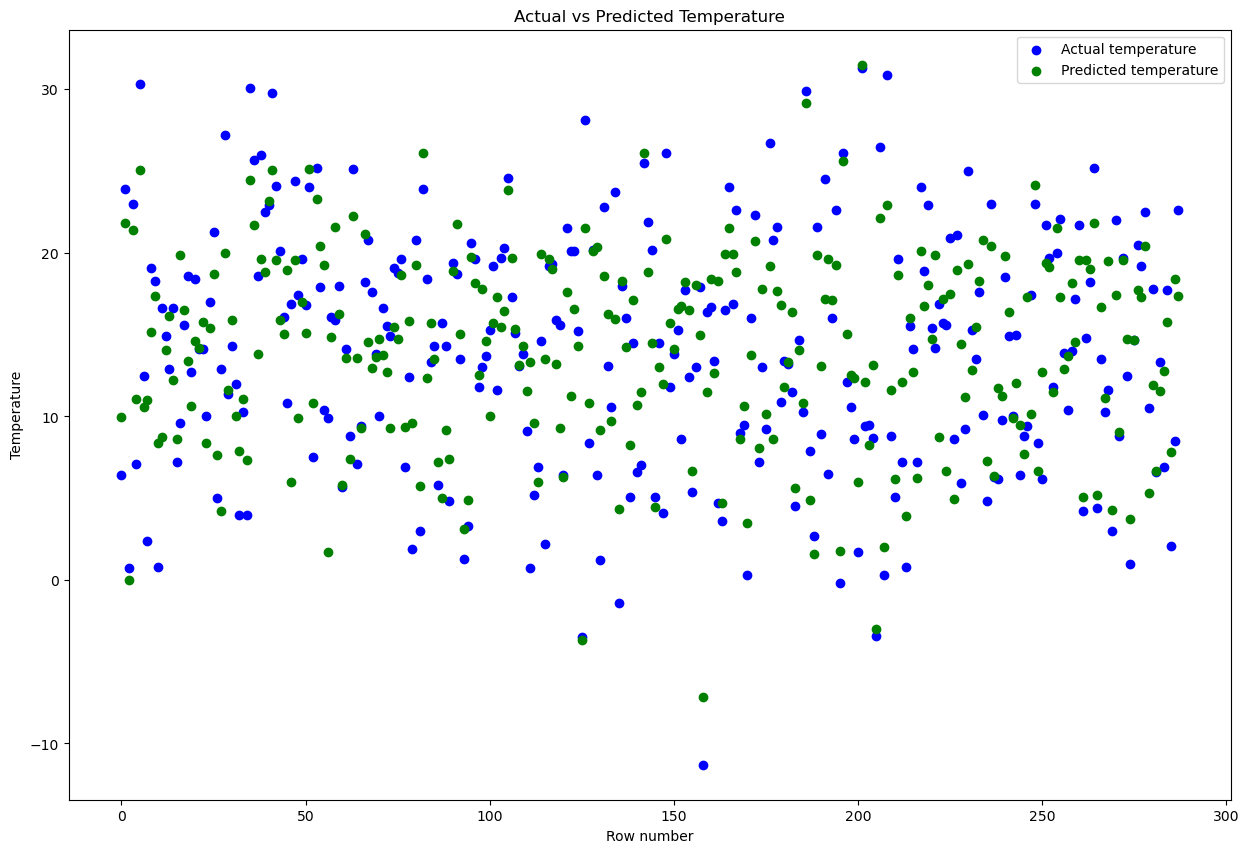

In [23]:
# Plot the actual and predicted values using scatterplot

plt.figure(figsize=(15, 10))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual temperature')
plt.scatter(range(len(y_test)), y_pred, color='green', label='Predicted temperature')
plt.xlabel('Row number')
plt.ylabel('Temperature')
plt.title('Actual vs Predicted Temperature')
plt.legend()
plt.show()

## Classification model

The final task is to create a classification model, where the target column must be a categorical column.
We have only one of this in our dataset, so that's given.
(In classification, we measure accuracy instead of R2 score.)
The real question is what model we should use. I've tried many models, for example: SVC, Decision trees, KNN, but the accuracy was very low in these cases. Luckily, the Random Forest can be used not just for regression models, but classification models too. Since i was desperate and i had no other idea, i gave it a try and suprisingly, i got the best accuracy. 
Unfortunately, it is still very low. The hyperparameter tuning i've tried was no step further neither.


Firstly, we choose the input and output columns just like we did above in the regression part.

In [24]:
X = df[['humidity', 'visibility', 'temperature', 'wind', 'temp_change', 'pressure', 'pressure_change', 'water_level', 'precipitation','fire','wl_change','temp_change','pressure_change']]  # Input features
y = df['weather']  # Target variable

Now, we split the dataset into training and testing parts just like we did above.

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

As mentioned, we are using the Random Forest classifier.

In [26]:
classifier = RandomForestClassifier(random_state=0)

Now, we fit the model.

In [27]:
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

Value prediction

In [28]:
y_pred = classifier.predict(X_test)

Now we create the confusion matrix and print out the accuracy.

In [29]:
cm = confusion_matrix(y_test, y_pred)

acc2 = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc2}")

Accuracy: 0.5


We got 50 % accuracy, which means that with the help of all other columns, we can predict weather conditions with the accuracy of 50 %.

In order to visualize the distribution of predicted and actual classes, we plot the confusion matrix as a heatmap.

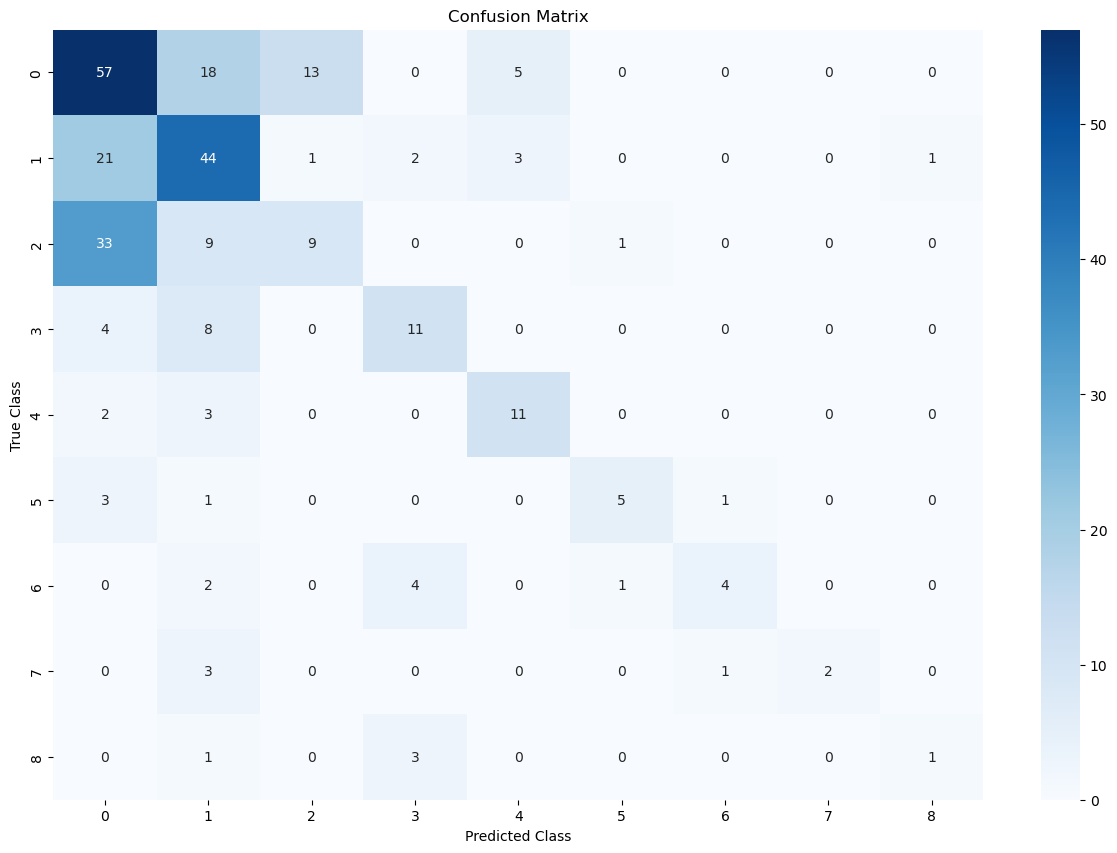

In [30]:
# Plot the heatmap

plt.figure(figsize=(15, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

The numbers in the main diagonal (top left - bottom right) are representing the correct predictions. (True class = Predicted class)

The off-diagonal cells represent the incorrect predictions. 
Each cell contains a count of instances that fall into a specific category. 

For example, the top left cell contains the number 57. This means that there were 57 cases, where both the predicted and actual classes were number 0.
The cell below it contains the number 21. This means that there were 21 cases where the predicted class was 0, but the true class was the first.

We can create a barplot too.

The x-axis represents the predicted classes. 
The y-axis represents the count of each predicted class. It shows how many instances were predicted to belong to each class.

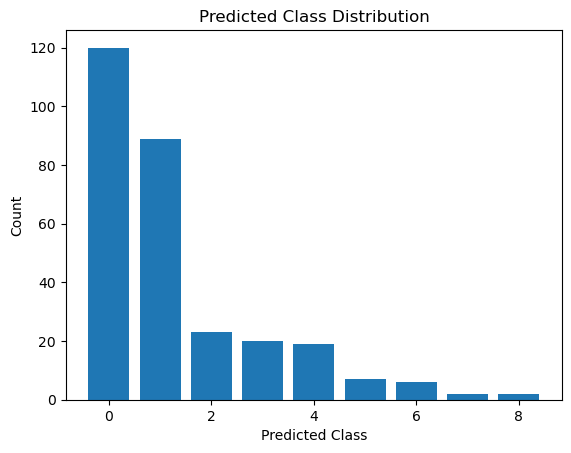

In [31]:
# Calculate predicted class counts
unique_classes, class_counts = np.unique(y_pred, return_counts=True)

# Plot bar plot
plt.bar(unique_classes, class_counts)
plt.xlabel('Predicted Class')
plt.ylabel('Count')
plt.title('Predicted Class Distribution')
plt.show()

The barplot shows us that classes number 0 (Partly cloudy) and 1 (Cloudy) are the dominant ones as they represent the predicted classes with higher counts.(The actual count values can be calculated by adding the numbers in the heatmap columnvise.)

Overall, i think i've ticked every requirement in the project description file.
At the beginning there were two preprocessing steps: i have changed the datatype of some columns and cleared out all of the negative values of the water_level column. After these steps, we got a clean dataset.

I've used 5 different visualization techniques to understand the content of the dataset and to explore significant relationship between the features. I have explained every step and result using "markdown" cells throughout the entire jupyter notebook.

Two supervised machine learning models were created as requested. The dataset was split into a training and a testing part in each case. I've used the fitted model to predict the output of the testing set. The performance was measured in the case of the regression model and the classification model as well.

In my opinion, a better dataset would higly affect the accuracy and R2 scores in the classification and regression part. For now, i have tried my best to achieve higher scores.

Visnyai Soma

OOZVBZ